In [221]:
import yt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
import cmasher as cmr
import pickle
import sys
from scipy.interpolate import interp1d
from scipy import optimize
import pyneb as pn
from pyneb import log_
from scipy.interpolate import UnivariateSpline

In [3]:
# Download data
cell_fields = [
    "Density",
    "x-velocity",
    "y-velocity",
    "z-velocity",
    "Pressure",
    "Metallicity",
    # "dark_matter_density",
    "xHI",
    "xHII",
    "xHeII",
    "xHeIII",
]
epf = [
    ("particle_family", "b"),
    ("particle_tag", "b"),
    ("particle_birth_epoch", "d"),
    ("particle_metallicity", "d"),
]

f1 = "/Users/srnpt.p/Desktop/ASTR498/output_00273"
f2 = "output_00274/info_00274.txt"

ds = yt.load(f1, fields = cell_fields, extra_particle_fields = epf, default_species_fields = "ionized")
ad = ds.all_data()

yt : [INFO     ] 2024-10-12 02:02:59,646 Parameters: current_time              = 4.311420483661945
yt : [INFO     ] 2024-10-12 02:02:59,647 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-10-12 02:02:59,647 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-12 02:02:59,647 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-10-12 02:02:59,647 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-10-12 02:02:59,648 Parameters: current_redshift          = 12.171087046255657
yt : [INFO     ] 2024-10-12 02:02:59,648 Parameters: omega_lambda              = 0.685000002384186
yt : [INFO     ] 2024-10-12 02:02:59,648 Parameters: omega_matter              = 0.314999997615814
yt : [INFO     ] 2024-10-12 02:02:59,648 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-10-12 02:02:59,648 Parameters: hubble_constant           = 0.674000015258789
yt : [WARNING  ] 2024-10-12 02:03:04,361 This output has no 

In [4]:
# Finding center of the data
x_pos = np.array(ad["star", "particle_position_x"])
y_pos = np.array(ad["star", "particle_position_y"])
z_pos = np.array(ad["star", "particle_position_z"])
x_center = np.mean(x_pos)
y_center = np.mean(y_pos)
z_center = np.mean(z_pos)
x_pos = x_pos - x_center
y_pos = y_pos - y_center
z_pos = z_pos - z_center
ctr_at_code = np.array([x_center, y_center, z_center])

In [5]:
# Adjusting width variable of the plot
pw = 400  # plot width on one side in pc
r_sf = 500  # radii for sf in pc
gas_res = 1000  # resolution of the fixed resolution buffer

plt_wdth = pw

In [6]:
# Showing the field of ds
print(dir(ds.fields))

['DM', 'cloud', 'cloud_tracer', 'deposit', 'dust', 'dust_tracer', 'gas', 'gas_tracer', 'gravity', 'index', 'io', 'nbody', 'ramses', 'ramses-rt', 'rt', 'sink', 'sink_csv', 'star', 'star_tracer']


In [7]:
# Showing star directory
print(dir(ds.fields.star))

['mesh_id', 'particle_angular_momentum', 'particle_angular_momentum_magnitude', 'particle_angular_momentum_x', 'particle_angular_momentum_y', 'particle_angular_momentum_z', 'particle_birth_epoch', 'particle_family', 'particle_identity', 'particle_index', 'particle_mass', 'particle_metallicity', 'particle_ones', 'particle_position', 'particle_position_cylindrical_radius', 'particle_position_cylindrical_theta', 'particle_position_cylindrical_z', 'particle_position_relative_x', 'particle_position_relative_y', 'particle_position_relative_z', 'particle_position_spherical_phi', 'particle_position_spherical_radius', 'particle_position_spherical_theta', 'particle_position_x', 'particle_position_y', 'particle_position_z', 'particle_radial_velocity', 'particle_radius', 'particle_refinement_level', 'particle_specific_angular_momentum', 'particle_specific_angular_momentum_x', 'particle_specific_angular_momentum_y', 'particle_specific_angular_momentum_z', 'particle_tag', 'particle_velocity', 'parti

yt : [INFO     ] 2024-10-12 02:03:14,391 Projection completed
yt : [INFO     ] 2024-10-12 02:03:14,396 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:14,396 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:14,398 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:14,398 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:14,400 Making a fixed resolution buffer of (('ramses', 'xHII')) 800 by 800



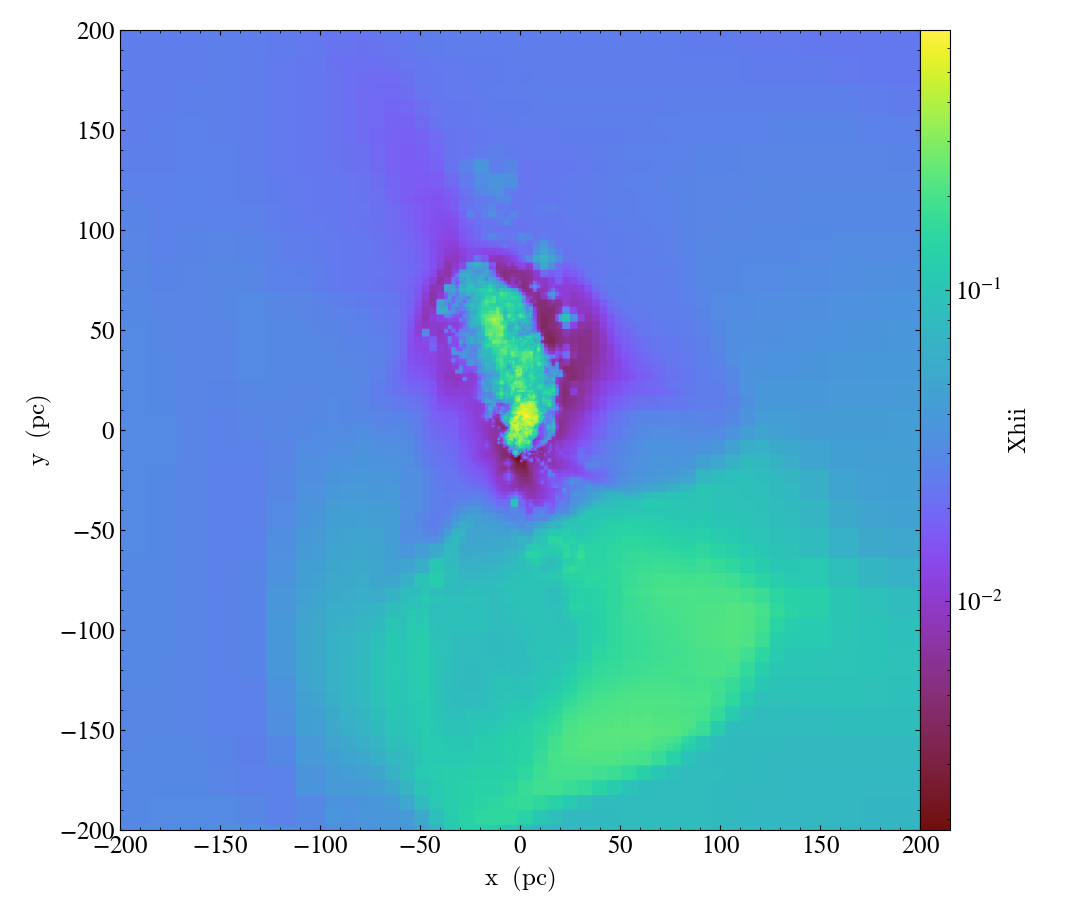

In [8]:
yt.ProjectionPlot(
    ds,
    "z",
    ("ramses", "xHII"),
    width = (plt_wdth, "pc"),
    weight_field = ("gas", "number_density"),
    center = ctr_at_code
)

yt : [INFO     ] 2024-10-12 02:03:18,424 Projection completed
yt : [INFO     ] 2024-10-12 02:03:18,425 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:18,425 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:18,426 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:18,427 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:18,427 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800



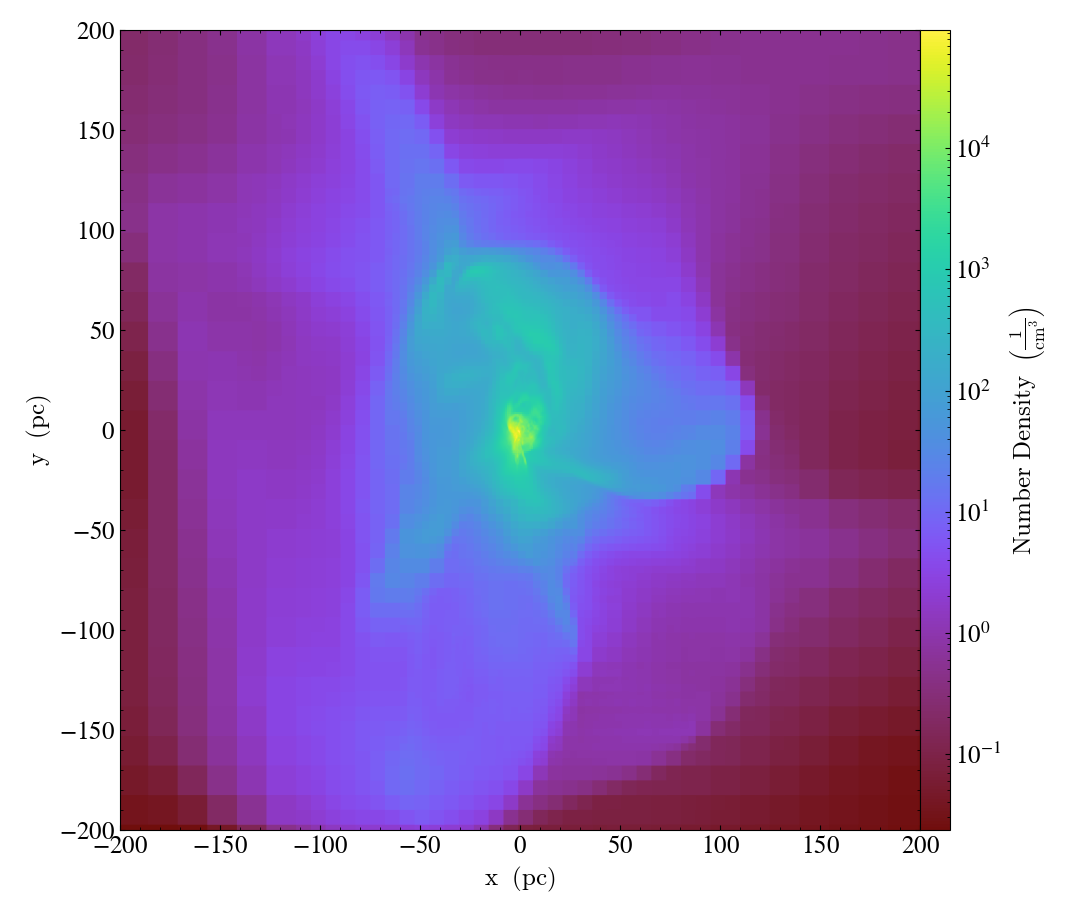

In [9]:
yt.ProjectionPlot(ds, 
                  "z", 
                  ("gas", "number_density"), 
                  width = (plt_wdth, "pc"),
                  weight_field = ("gas", "number_density"),
                  center = ctr_at_code
)

yt : [INFO     ] 2024-10-12 02:03:23,222 Projection completed
yt : [INFO     ] 2024-10-12 02:03:23,223 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:23,223 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:23,225 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:23,225 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:23,225 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



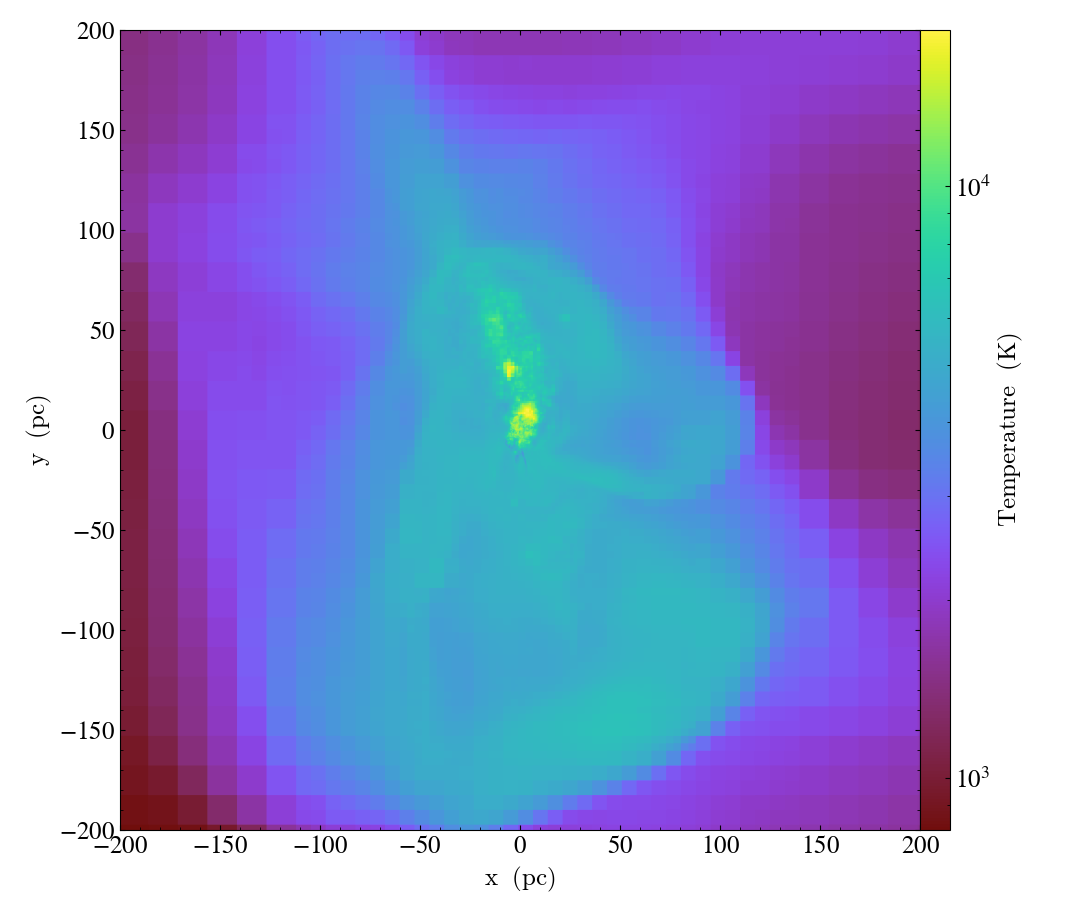

In [10]:
yt.ProjectionPlot(ds, 
                  "z", 
                  ("gas", "temperature"), 
                  width = (plt_wdth, "pc"),
                  weight_field = ("gas", "number_density"),
                  center = ctr_at_code
)

yt : [INFO     ] 2024-10-12 02:03:27,931 Projection completed
yt : [INFO     ] 2024-10-12 02:03:27,931 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:27,932 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:27,933 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:27,933 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:27,934 Making a fixed resolution buffer of (('ramses', 'Metallicity')) 800 by 800



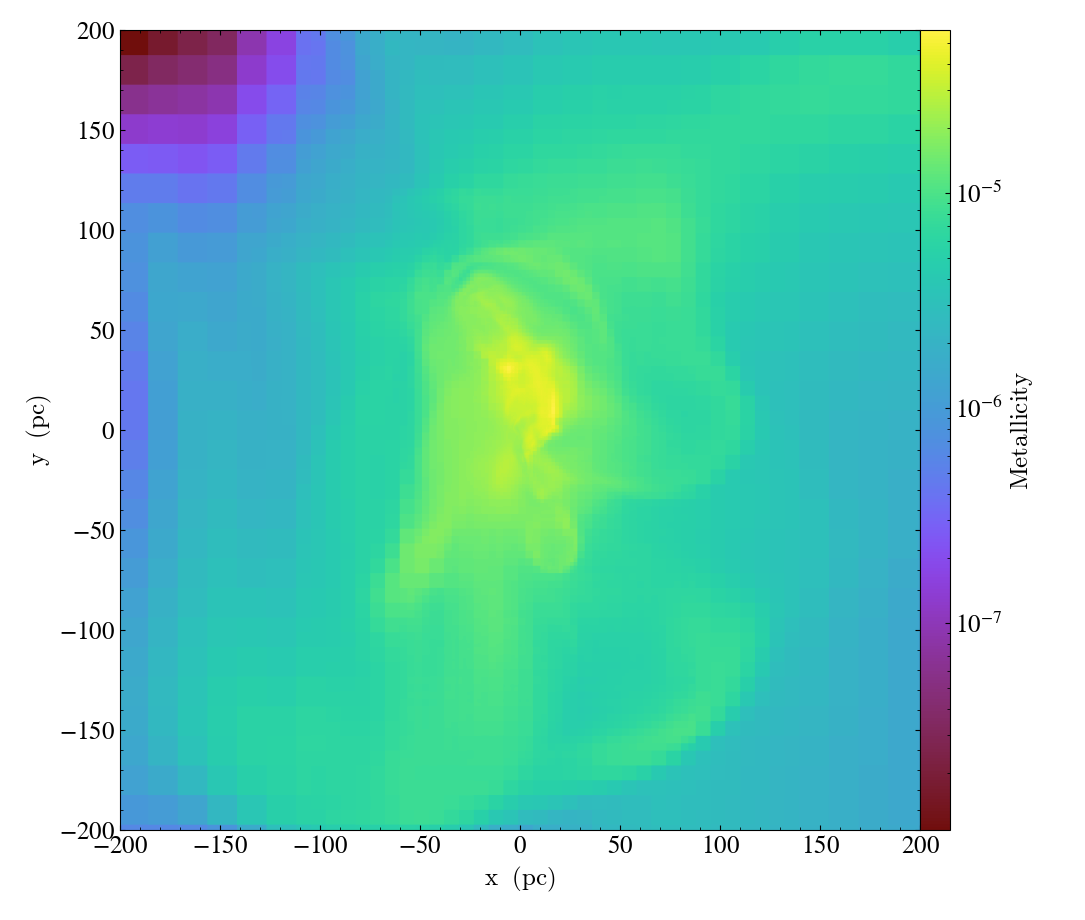

In [11]:
yt.ProjectionPlot(ds, 
                  "z", 
                  ("ramses", "Metallicity"), 
                  width = (plt_wdth, "pc"),
                  weight_field = ("gas", "number_density"),
                  center = ctr_at_code
)

yt : [INFO     ] 2024-10-12 02:03:29,154 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:29,155 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:29,156 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:29,156 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:29,156 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800



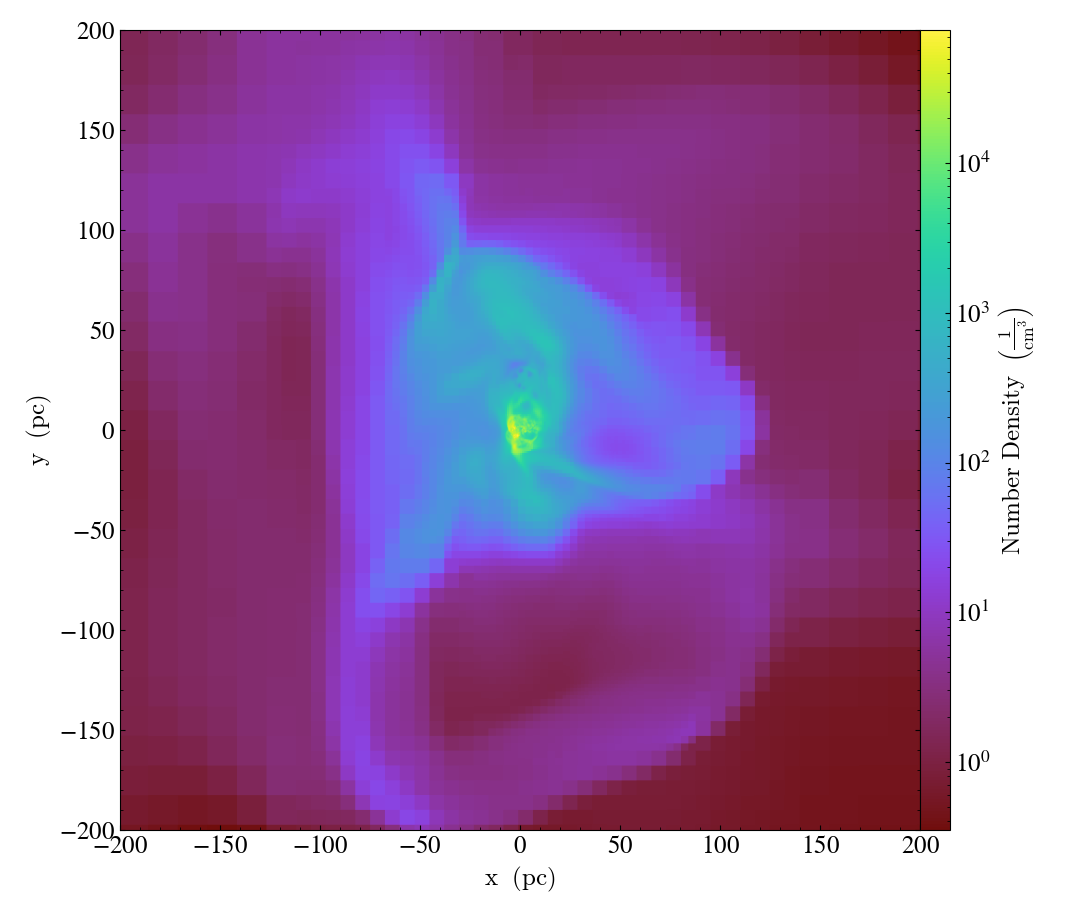

In [12]:
yt.SlicePlot(ds, 
            "z", 
            ("gas", "number_density"), 
            width = (plt_wdth, "pc"),
            center = ctr_at_code
)

yt : [INFO     ] 2024-10-12 02:11:57,488 Projection completed
yt : [INFO     ] 2024-10-12 02:11:57,489 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:11:57,489 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:11:57,490 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:11:57,490 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:11:57,491 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800


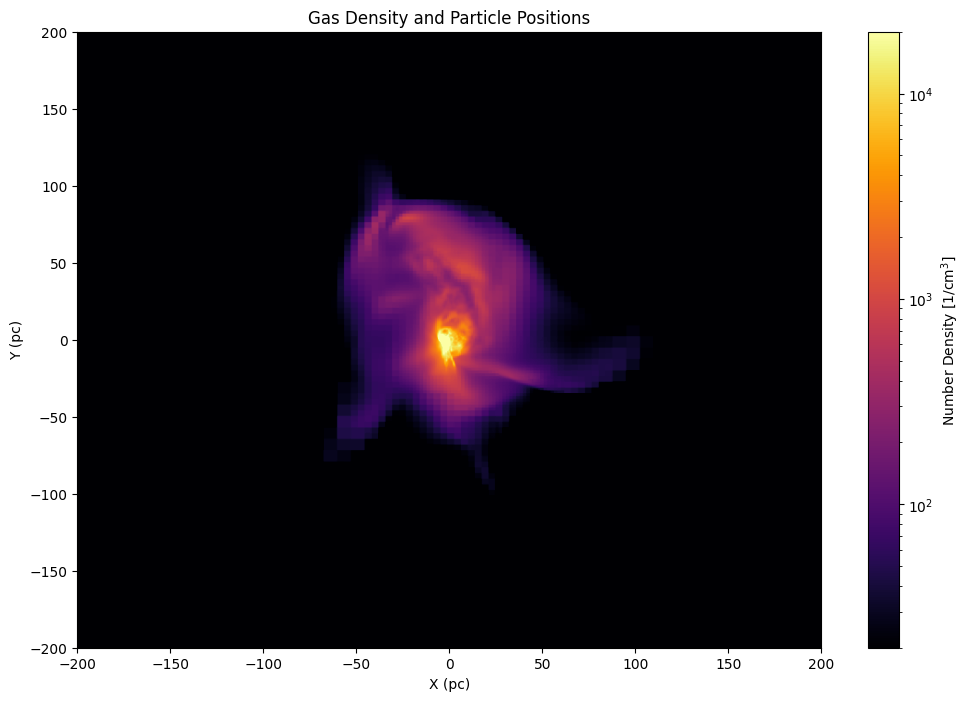

In [53]:
# Create a ProjectionPlot
p = yt.ProjectionPlot(ds, 
                     "z", 
                     ("gas", "number_density"), 
                     width = (plt_wdth, "pc"),
                     weight_field = ("gas", "number_density"),
                     center = ctr_at_code
)
p_frb = p.frb  # Fixed-Resolution Buffer from the projection
p_img = np.array(p_frb["gas", "number_density"])
star_bins = 2000
star_mass = np.ones_like(x_pos) * 10
pop2_xyz = np.array(ds.arr(np.vstack([x_pos, y_pos, z_pos]), "code_length").to("pc")).T
extent_dens = [-plt_wdth/2, plt_wdth/2, -plt_wdth/2, plt_wdth/2]
gas_range = (20, 2e4)
norm1 = LogNorm(vmin = gas_range[0], vmax = gas_range[1])
plt.figure(figsize = (12,8))
plt.imshow(p_img, norm = norm1, extent = extent_dens, origin = 'lower', aspect = 'auto', cmap = 'inferno')
plt.colorbar(label = r"Number Density [1/cm$^3$]")
# plt.scatter(pop2_xyz[:, 0], pop2_xyz[:, 1], s = 5, marker = '.', color = 'red')
plt.xlabel("X (pc)")
plt.ylabel("Y (pc)")
plt.title("Gas Density and Particle Positions")
plt.xlim(-plt_wdth/2, plt_wdth/2)
plt.ylim(-plt_wdth/2, plt_wdth/2)
plt.show()

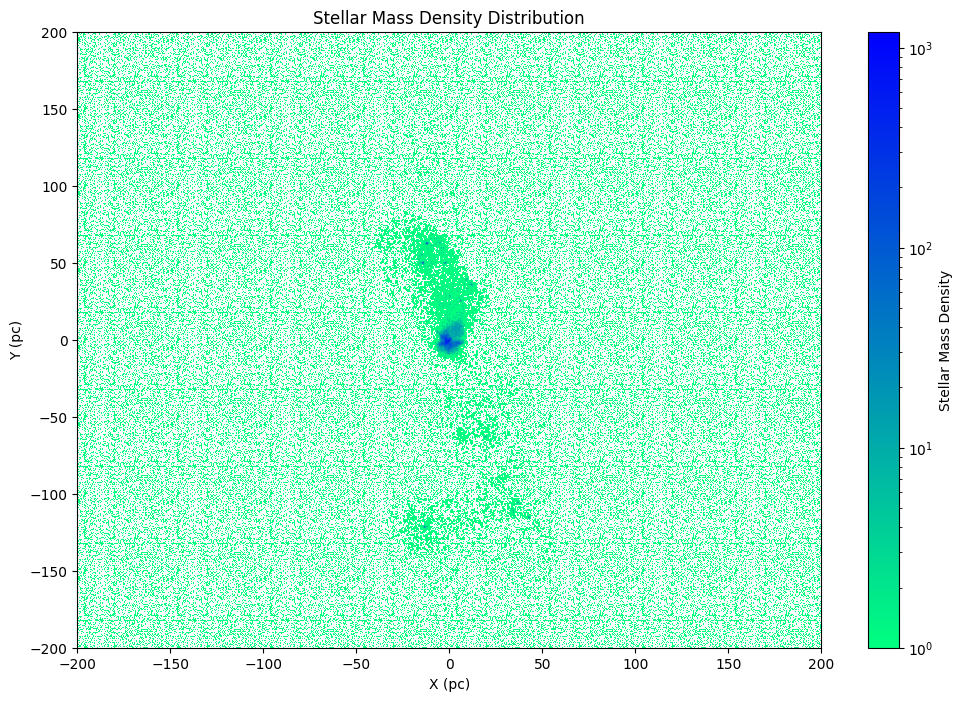

In [51]:
stellar_mass_dens, _, _ = np.histogram2d(pop2_xyz[:, 0],
                                         pop2_xyz[:, 1],
                                         bins = star_bins,
                                         weights = star_mass,
                                         range = [[-plt_wdth / 2, plt_wdth / 2],
                                                  [-plt_wdth / 2, plt_wdth / 2],
                                                 ],
)
stellar_mass_dens = stellar_mass_dens.T
stellar_mass_dens = np.where(stellar_mass_dens <= 1, 0, stellar_mass_dens)
stellar_range = (1, 1200)
norm2 = LogNorm(vmin = stellar_range[0], vmax = stellar_range[1])
plt.figure(figsize = (12, 8))
lumcmap = "cmr.amethyst"
plt.imshow(stellar_mass_dens, norm = norm2, extent = extent_dens, origin = 'lower', aspect = 'auto', cmap = 'winter_r')
plt.colorbar(label = "Stellar Mass Density")
plt.xlabel("X (pc)")
plt.ylabel("Y (pc)")
plt.title("Stellar Mass Density Distribution")
plt.show()

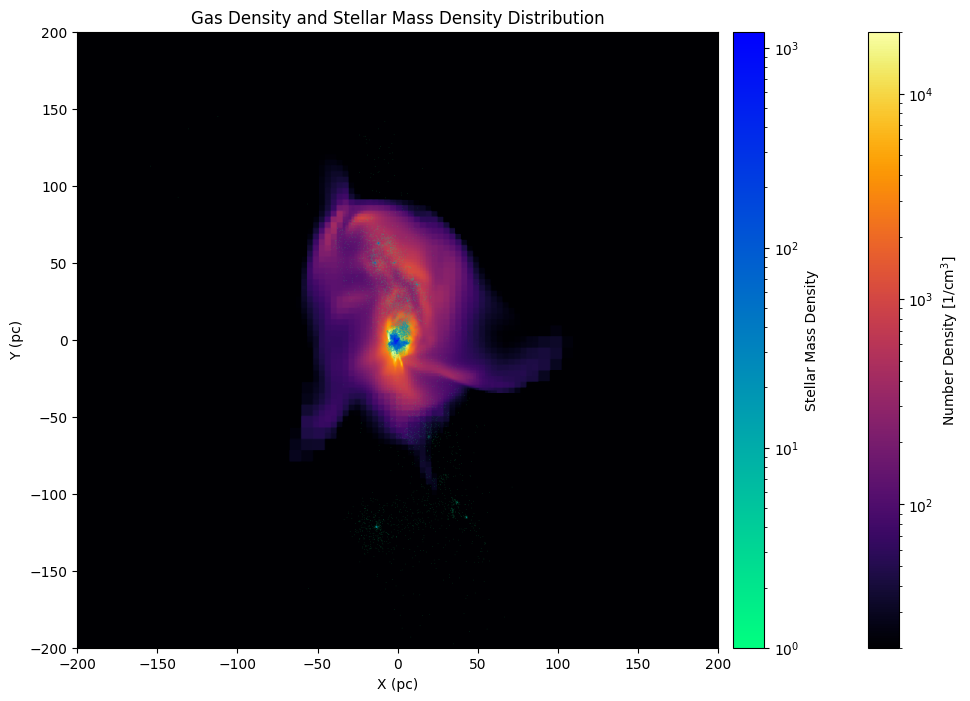

In [15]:
fig, ax = plt.subplots(figsize = (12, 8))
alpha_star = stellar_mass_dens
alpha_star = np.where(stellar_mass_dens <= 1, 0.0, 1)
img1 = ax.imshow(p_img, norm = norm1, extent = extent_dens, origin = 'lower', aspect = 'auto', cmap = 'inferno', alpha = 1)
cbar1 = fig.colorbar(img1, ax = ax, orientation = 'vertical', pad = 0.02)
cbar1.set_label(r"Number Density [1/cm$^3$]")
img2 = ax.imshow(stellar_mass_dens, norm = norm2, extent = extent_dens, origin = 'lower', aspect = 'auto', cmap = 'winter_r', alpha = alpha_star)
cbar2 = fig.colorbar(img2, ax = ax, orientation = 'vertical', pad = 0.02)
cbar2.set_label("Stellar Mass Density")
# ax.scatter(pop2_xyz[:, 0], pop2_xyz[:, 1], s=5, marker='.', color='black')
ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")
ax.set_title("Gas Density and Stellar Mass Density Distribution")
ax.set_xlim(-plt_wdth / 2, plt_wdth / 2)
ax.set_ylim(-plt_wdth / 2, plt_wdth / 2)
plt.show()

In [16]:
# number density of proton
n_proton = np.array(ad["gas", "H_p1_number_density"])
n_proton

array([0.00039133, 0.00040961, 0.00042907, ..., 0.00026862, 0.00029636,
       0.00029001])

yt : [INFO     ] 2024-10-12 02:03:39,472 Projection completed
yt : [INFO     ] 2024-10-12 02:03:39,473 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-10-12 02:03:39,473 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-10-12 02:03:39,474 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-10-12 02:03:39,474 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-10-12 02:03:39,475 Making a fixed resolution buffer of (('gas', 'H_p1_number_density')) 800 by 800



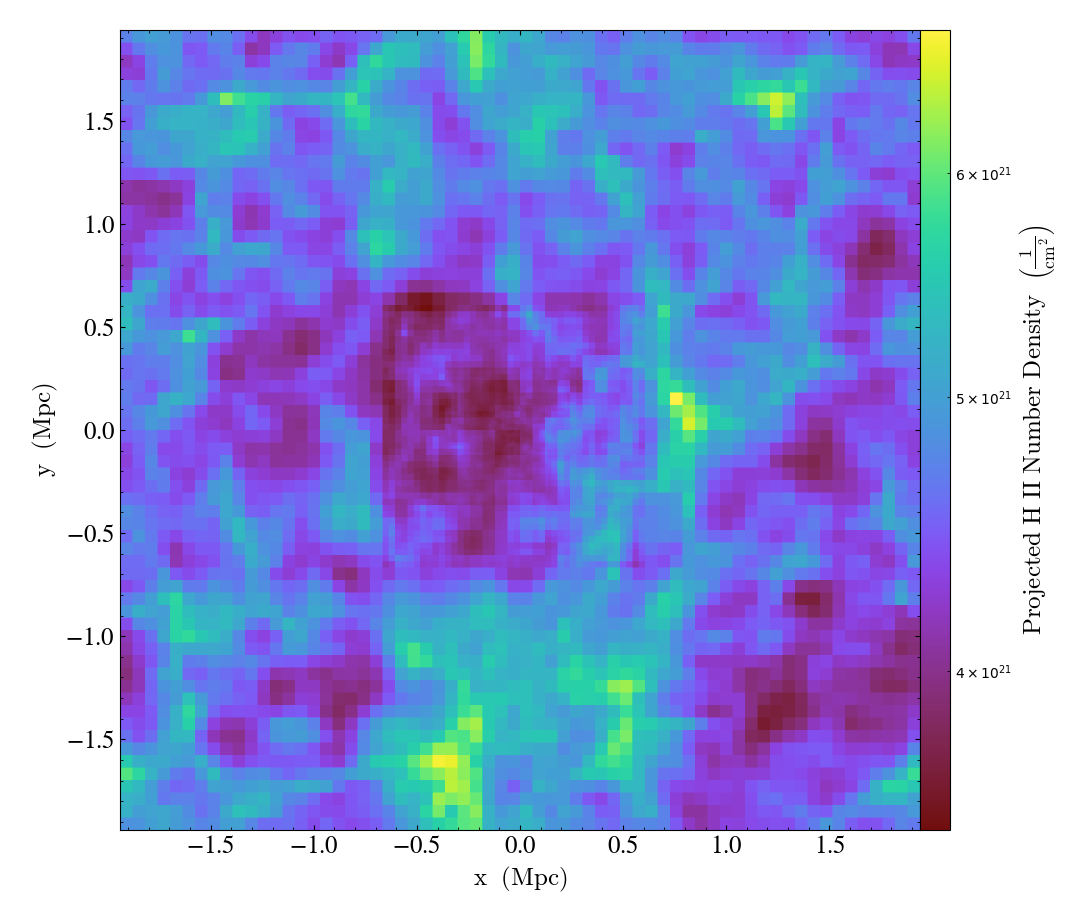

In [17]:
# proton number density plot
yt.ProjectionPlot(ds, "z", ("gas", "H_p1_number_density"))

yt : [INFO     ] 2024-10-12 02:03:43,142 Projection completed
yt : [INFO     ] 2024-10-12 02:03:43,143 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:43,144 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:43,145 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:43,145 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:43,146 Making a fixed resolution buffer of (('gas', 'H_p1_number_density')) 800 by 800



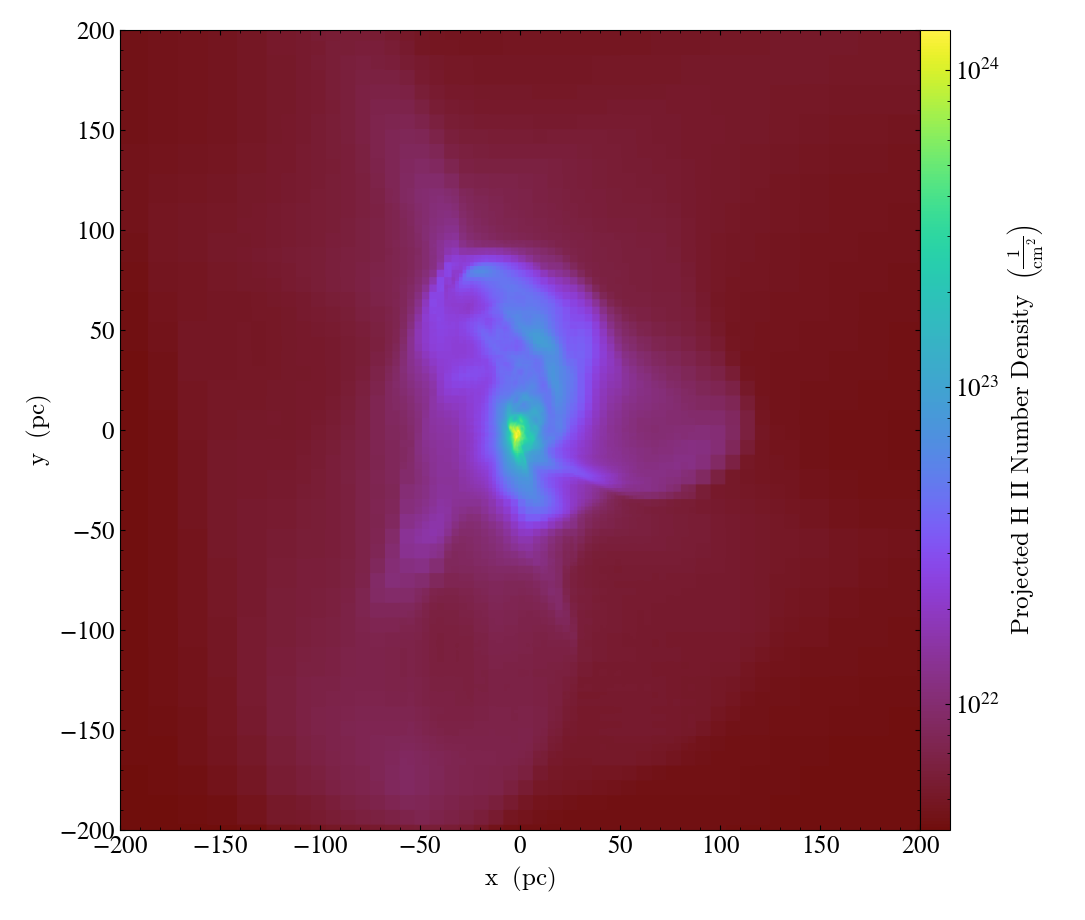

In [18]:
# proton number density plot with width and center
yt.ProjectionPlot(ds, "z", ("gas", "H_p1_number_density"), width = (plt_wdth, "pc"), center = ctr_at_code)

In [19]:
# number density of electron
n_electron = np.array(ad["gas", "El_number_density"])
n_electron

array([0.00045357, 0.00047476, 0.00049731, ..., 0.00031135, 0.00034349,
       0.00033613])

yt : [INFO     ] 2024-10-12 02:03:48,984 Projection completed
yt : [INFO     ] 2024-10-12 02:03:48,984 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-10-12 02:03:48,984 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-10-12 02:03:48,986 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-10-12 02:03:48,986 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-10-12 02:03:48,986 Making a fixed resolution buffer of (('gas', 'El_number_density')) 800 by 800



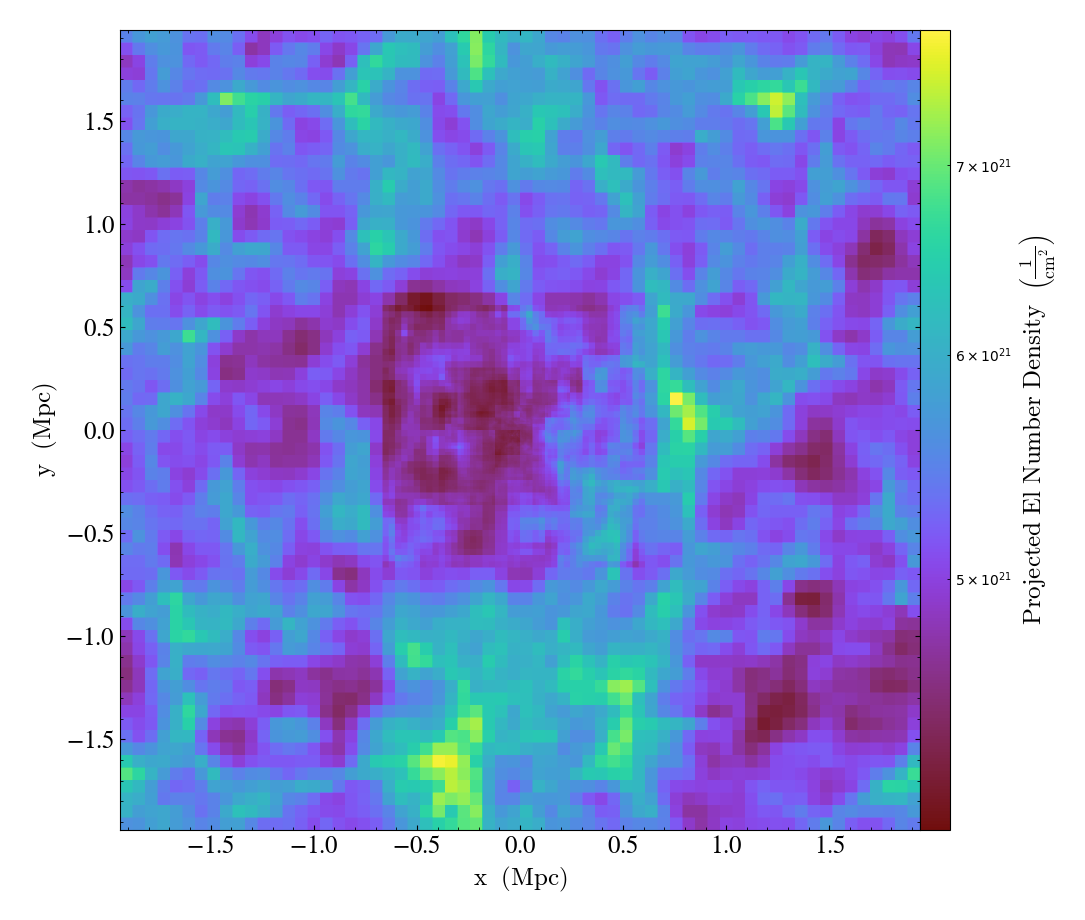

In [20]:
# electron number density plot
yt.ProjectionPlot(ds, "z", ("gas", "El_number_density"))

yt : [INFO     ] 2024-10-12 02:03:52,653 Projection completed
yt : [INFO     ] 2024-10-12 02:03:52,654 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:52,654 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:52,655 xlim = 0.491120 0.491223
yt : [INFO     ] 2024-10-12 02:03:52,655 ylim = 0.492725 0.492828
yt : [INFO     ] 2024-10-12 02:03:52,656 Making a fixed resolution buffer of (('gas', 'El_number_density')) 800 by 800



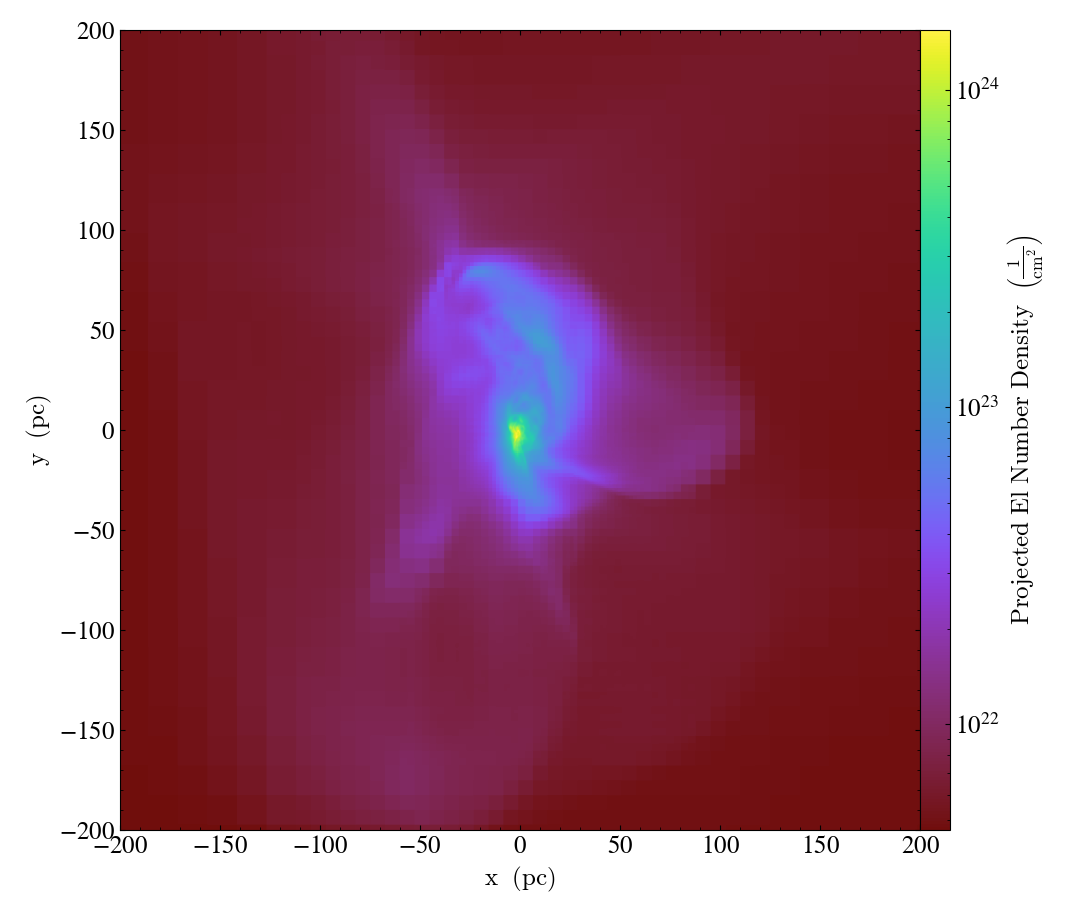

In [21]:
# electron number density plot with width and center
yt.ProjectionPlot(ds, "z", ("gas", "El_number_density"), width = (plt_wdth, "pc"), center = ctr_at_code)

In [22]:
# wavelength = between 912 nm to 10^5 nm
# temperature = temp of the gas
#wl * (1+z)

In [23]:
class Continuum(object):
    
    def __init__(self):
        """Part of the PyNeb library.
        
        Mainly based on pySSN library        
        Adapted by V. Gomez-Llanos and C. Morisset, 2018
        """
        self.BE = None
        self.__HI_case = None
        self._set_HI_case('B')
        self.log_ = log_

        
    def _set_HI_case(self, case='B'):
        """Define the case (A or B) to be used for HI normalization line.
        
        Not sure that the Free-bound coefficients from Ercolano & Storey 2006 take case A option into account.
        
        Parameters:
            case (string): 'A' or 'B'
        """            
        if case != self.__HI_case:
            if case == 'A':
                pn.atomicData.setDataFile('h_i_rec_SH95-caseA.hdf5')
                self.HI = None
            elif case == 'B':
                pn.atomicData.setDataFile('h_i_rec_SH95.hdf5')
                self.HI = None
            else:
                raise ValueError('Unkown case {}. Should be A or B'.format(case))
            self.__HI_case = case
        
    def make_cont_Ercolano(self, tem, case, wl):
        """Adapted from http://adsabs.harvard.edu/abs/2006MNRAS.372.1875E
        
        Parameters:
            tem : electron temperature [K]. Can not be an array. 
                  In case of tem array, use get_continuum
            case: one of "H", "He1", "He2"
            wl: wavelength [Angstrom]. May be a float or a numpy array
        
        Returns:
            The continuum [erg/s.cm3/A]
        """
        try:
            _ = (e for e in wl)
        except TypeError:
            wl = np.array([wl])

        n_wl = len(wl)
        hnu =  CST.CLIGHT * 1e8 / wl * CST.HPLANCK  #!phy.c_ang_sec/wl*!phy.h
        if case == 'H':
            tab_T = 10**np.array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
                                  3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
                                  4.6, 4.7, 4.8, 4.9, 5. ])
            D = np.loadtxt(ROOT_DIR + '/' + 'atomic_data/coeff_ercolano_H.txt')
        elif case == 'He1':
            tab_T = 10**np.array([2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28, 2.32, 2.36, 2.4 ,
                                  2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72, 2.76, 2.8 , 2.84,
                                  2.88, 2.92, 2.96, 3.  , 3.04, 3.08, 3.12, 3.16, 3.2 , 3.24, 3.28,
                                  3.32, 3.36, 3.4 , 3.44, 3.48, 3.52, 3.56, 3.6 , 3.64, 3.68, 3.72,
                                  3.76, 3.8 , 3.84, 3.88, 3.92, 3.96, 4.  , 4.04, 4.08, 4.12, 4.16,
                                  4.2 , 4.24, 4.28, 4.32, 4.36, 4.4 , 4.44, 4.48, 4.52, 4.56, 4.6 ,
                                  4.64, 4.68, 4.72, 4.76, 4.8 , 4.84, 4.88, 4.92, 4.96, 5.  ])
            D = np.loadtxt(ROOT_DIR + '/' + 'atomic_data/coeff_ercolano_He1.txt')
        elif case == 'He2':
            tab_T = 10**np.array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
                                  3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
                                  4.6, 4.7, 4.8, 4.9, 5. ])
            D = np.loadtxt(ROOT_DIR + '/' + 'atomic_data/coeff_ercolano_He2.txt')
        else:
            self.log_.warn('Invalid case {0}'.format(case), calling='Continuum.make_cont_Ercolano')
            return np.nan
        if (tem < np.min(tab_T)).any() or (tem > np.max(tab_T)).any():
            self.log_.warn('Invalid temperature {0}'.format(tem), calling='Continuum.make_cont_Ercolano')            
            return np.nan
        
        BE_E_Ry = D[:,1]
        BE_E_erg = BE_E_Ry * CST.RYD_erg
        BE_E_Thr = BE_E_erg[D[:,0] == 1]
        Delta_E = np.zeros(n_wl)
        for i in np.arange(n_wl):
            DE = hnu[i] - BE_E_Thr
            Delta_E[i] = np.min(DE[DE > 0])
            
        n_T_sup = np.min(np.where(tab_T >= tem)[0])
        n_T_inf = n_T_sup - 1
        T_sup = tab_T[n_T_sup]
        T_inf = tab_T[n_T_inf]
        
        BE_coeff_sup = D[:, n_T_sup+2]
        BE_coeff_inf = D[:, n_T_inf+2]
        
        coeff_sup = interp1d(BE_E_erg, BE_coeff_sup)(hnu)
        coeff_inf = interp1d(BE_E_erg, BE_coeff_inf)(hnu)

        C_interp= (np.log10(tem) - np.log10(T_inf)) / (np.log10(T_sup) - np.log10(T_inf))
        
        coeff = coeff_sup * C_interp + coeff_inf*(1. - C_interp)
        
        cont = coeff * 1e-34 * tem**(-1.5) * np.exp(-Delta_E / tem / CST.BOLTZMANN) / wl**2. * CST.CLIGHT * 1e8 # erg/s.cm3/A
        return cont.squeeze()

    def two_photon(self, tem, den, wl):
        """
        Parameters:
            tem: temperature [K]. May be a float or a numpy array
            den: density [cm-3]
            wl: wavelength [Angstrom]. May be a float or a numpy array
            
        Returns:
            2 photons continuum [erg/s.cm3/A]
        """
        #ToDo : See Schirmer, M. 2016, PASP, 128, 114001 
        try:
            _ = (e for e in wl)
        except TypeError:
            wl = np.array([wl])
        y = 1215.7 / wl
        A = 202.0 * (y * (1. - y) * (1. -(4. * y * (1 - y))**0.8) + 0.88 * ( y * (1 - y))**1.53 * (4. * y * (1 - y))**0.8)
        mask = y > 1.0 # Thanks to Daniel Schaerer for pointing out this potential issue
        A[mask] = 0.
        alfa_eff = 0.838e-13 * (tem / 1e4)**(-0.728) # fit DP de Osterbrock
        q = 5.31e-4 * (tem / 1e4)**(-0.17) # fit DP de Osterbrock
        n_crit = 8.226 / q
        twophot_cont = CST.HPLANCK * CST.CLIGHT * 1e8 / wl**3. * 1215.7 * A / 8.226 * alfa_eff / \
                       (1. + den/n_crit)                
        #twophot_cont[~np.isfinite(twophot_cont)] = 0.
        return twophot_cont
            
    def gff(self, Z, tem, wl):
        """Adaptated from http://adsabs.harvard.edu/abs/1991CoPhC..66..129S
        
        Parameters:
            Z: atomic number
            tem: temperature [K]
            wk: wavelength [Angstrom]
        """
        D= np.array([8.986940175e+00, -4.009515855e+00,  8.808871266e-01,
            2.640245111e-02, -4.580645915e-02, -3.568055702e-03,   
            2.827798067e-03,  3.365860195e-04, -8.006936989e-01,
            9.466021705e-01,  9.043402532e-02, -9.608451450e-02,
            -1.885629865e-02,  1.050313890e-02,  2.800889961e-03, 
            -1.078209202e-03, -3.781305103e-01,  1.102726332e-01, 
            -1.543619180e-02,  8.310561114e-03,  2.179620525e-02, 
            4.259726289e-03, -4.181588794e-03, -1.770208330e-03,   
            1.877213132e-02, -1.004885705e-01, -5.483366378e-02,   
            -4.520154409e-03,  8.366530426e-03,  3.700273930e-03, 
            6.889320423e-04,  9.460313195e-05,  7.300158392e-02,   
            3.576785497e-03, -4.545307025e-03, -1.017965604e-02,   
            -9.530211924e-03, -3.450186162e-03,  1.040482914e-03, 
            1.407073544e-03, -1.744671550e-03,  2.864013856e-02,   
            1.903394837e-02,  7.091074494e-03, -9.668371391e-04,   
            -2.999107465e-03, -1.820642230e-03, -3.874082085e-04, 
            -1.707268366e-02, -4.694254776e-03,  1.311691517e-03, 
            5.316703136e-03,  5.178193095e-03,  2.451228935e-03,   
            -2.277321615e-05, -8.182359057e-04,  2.567331664e-04, 
            -9.155339970e-03, -6.997479192e-03, -3.571518641e-03, 
            -2.096101038e-04,  1.553822487e-03,  1.509584686e-03, 
            6.212627837e-04,  4.098322531e-03,  1.635218463e-03,   
            -5.918883504e-04, -2.333091048e-03, -2.484138313e-03, 
            -1.359996060e-03, -5.371426147e-05,  5.553549563e-04, 
            3.837562402e-05,  2.938325230e-03,  2.393747064e-03,   
            1.328839809e-03,  9.135013312e-05, -7.137252303e-04,   
            -7.656848158e-04, -3.504683798e-04, -8.491991820e-04, 
            -3.615327726e-04,  3.148015257e-04,  8.909207650e-04, 
            9.869737522e-04,  6.134671184e-04,  1.068883394e-04,   
            -2.046080100e-04 ])
    
        try:
            _ = (e for e in wl)
        except TypeError:
            wl = np.array([wl])
    
    
        XLF = np.log10(CST.CLIGHT * 1e8 / wl)
        N_wl = len(wl)
        G = np.zeros(N_wl)
        D = D.reshape(11, 8)
        B = np.zeros(11)
        C = np.zeros(8)
    
        XLRKT = 5.1983649 - np.log10(tem)
        TXG = 0.66666667 * (2.0 * np.log10(Z) + XLRKT)
    
        for j in np.arange(7):
            B[10] = D[10, j]
            B[9] = TXG * B[10] + D[9, j]
            for IR in np.arange(8)[::-1]:
                B[IR] = TXG * B[IR+1] - B[IR+2] + D[IR, j]
            C[j] = 0.25 * (B[0] - B[2])               
    
    
        CON=0.72727273 * XLRKT - 10.376127  
    
        for i in np.arange(N_wl):
            TXU = 0.72727273 * XLF[i] + CON 
            B[7] = C[7]
            B[6] = TXU * B[7] + C[6] 
            for IR in np.arange(5)[::-1]: 
                B[IR] = TXU * B[IR+1] - B[IR+2] + C[IR]
            G[i] = B[0] - B[2]
    
        return G.squeeze()

    def FreeFree(self, tem, wl, He1_H=0., He2_H=0., tem_HeI=None, tem_HeII=None):
        """
        Parameters:
            tem:
            wl:
            He1_H (float) default: 0.
            He2_H (float) default: 0.
            tem_HeI (float) default: None.
            tem_HeII (float) default: None.
        """
        if tem_HeI is None:
            tem_HeI = tem
        if tem_HeII is None:
            tem_HeII = tem
            
        gff_HI = self.gff(1., tem, wl)
        gff_HeI = self.gff(1., tem_HeI, wl)
        gff_HeII = self.gff(4., tem_HeII, wl)

        FF_cont = (6.8391014e-38 * CST.CLIGHT * 1e8 / wl**2. * (
                        1.0**2. / np.sqrt(tem) * np.exp(-CST.HPLANCK*CST.CLIGHT*1e8/wl/CST.BOLTZMANN/tem) * gff_HI + 
                        He1_H * 1.0**2./ np.sqrt(tem_HeI) * np.exp(-CST.HPLANCK*CST.CLIGHT*1e8/wl/CST.BOLTZMANN/tem_HeI) * gff_HeI  + 
                        He2_H* 2.0**2. / np.sqrt(tem_HeII) * np.exp(-CST.HPLANCK*CST.CLIGHT*1e8/wl/CST.BOLTZMANN/tem_HeII) * gff_HeII))
        return FF_cont
    
    def _get_continuum1(self, tem, den, He1_H=0., He2_H=0., wl=None, 
                      cont_HI=True, cont_HeI=True, cont_HeII=True, 
                      cont_2p=True, cont_ff=True):
        """
        Type of continuum to take into acount defined a boolean, defaults are True
        
        Parameters:
            tem: temperature [K]. May be a float or an iterable
            den: density [cm-3]. May be a float or an iterable. If iterable, must have same size than tem
            He1_H and He2_H: He+/H+ and He++/H+ abundances. Default = 0.0
            wl: wavelengths: May be an array
            cont_HI (bool) default: True
            cont_HeI (bool) default: True
            cont_HeII (bool) default:True using B. Ercolano 2006 data
            cont_2p (bool) default: True 2 photons, using D. Pequignot fit to Osterbrock
            cont_ff (bool) default: 
            
        Returns:
            The resulting continuum [erg/s.cm3/A]
        """

        cont = 0.
        if cont_HI:
            cont += self.make_cont_Ercolano(tem = tem, case = 'H', wl = wl)
        if cont_HeI and He1_H > 0.:
            cont += He1_H * self.make_cont_Ercolano(tem = tem, case = 'He1', wl = wl)
        if cont_HeII and He2_H > 0:
            cont += He2_H * self.make_cont_Ercolano(tem = tem, case = 'He2', wl = wl)
        if cont_2p:
            cont += self.two_photon(tem = tem, den = den, wl = wl)
        if cont_ff:
            cont += self.FreeFree(tem = tem, wl = wl, He1_H=He1_H, He2_H=He2_H)
        
        return cont

    def get_continuum(self, tem, den, He1_H=0., He2_H=0., wl=np.array([3500, 3600, 3700, 3800, 3900]), 
                      cont_HI=True, cont_HeI=True, cont_HeII=True, 
                      cont_2p=True, cont_ff=True, HI_label='11_2'):
        """
        
        Type of continuum to take into acount defined a boolean, defaults are True
        
        Parameters:
            tem: temperature [K]. May be a float or an iterable.
            den: density [cm-3]. May be a float or an iterable. If iterable, must have same size than tem.
            He1_H (float):  He+/H+ abundance. Default = 0.0
            He2_H (float): He++/H+ abundances.  Default = 0.0
            wl (np.array): Wavelengths Default = np.array([3500, 3600, 3700, 3800, 3900])
            cont_HI (bool): using B. Ercolano 2006 data. Default: True
            cont_HeI (bool): using B. Ercolano 2006 data. Default: True
            cont_HeII (bool): using B. Ercolano 2006 data. Default: True
            cont_2p (bool): 2 photons, using D. Pequignot fit to Osterbrock. Default: True
            cont_ff (bool): from Storey & Hummer 1991. Default: True
            
            HI_label (str): HI label to normalize the continuum. If None, no normalization is done. Default: '11_2'
            
        Returns:
            The resulting continuum. Unit [A-1] if normalized, [erg/s.cm3/A] otherwise
        
        Exemple of use:
            C = pn.Continuum()
            wl = np.arange(3500, 4000, 1)
            cont = C.get_continuum(tem=1e4, den=1e2, He1_H=0.08, He2_H=0.02, wl=wl)
            plt.plot(wl, cont)
        """
        try:
            _ = (e for e in tem)
            T_iterable = True
            try:
                _ = (e for e in den)
            except:
                den = np.ones_like(tem) * den
            try:
                _ = (e for e in He1_H)
            except:
                He1_H = np.ones_like(tem) * He1_H
            try:
                _ = (e for e in He2_H)
            except:
                He2_H = np.ones_like(tem) * He2_H
            
        except TypeError:
            T_iterable = False
        if HI_label is None:
            norm = 1.0
        else:
            if self.HI is None:
                self.HI = pn.RecAtom('H',1)
            norm = self.HI.getEmissivity(tem, den, label = HI_label, product=False)
            
        if T_iterable:
            cont = np.array(list(map(lambda t, d, He1_H_1,He2_H_1 : self._get_continuum1(t, d, 
                                                                                  He1_H=He1_H_1, 
                                                                                  He2_H=He2_H_1, 
                                                                                  wl=wl, 
                                                                                  cont_HI=cont_HI, 
                                                                                  cont_HeI=cont_HeI, 
                                                                                  cont_HeII=cont_HeII, 
                                                                                  cont_2p=cont_2p, 
                                                                                  cont_ff=cont_ff), 
                                     tem, den, He1_H, He2_H))).T
            return cont.squeeze()/norm
        else:
            cont = self._get_continuum1(tem, den, He1_H=He1_H, He2_H=He2_H, wl=wl, 
                                        cont_HI=cont_HI, cont_HeI=cont_HeI, cont_HeII=cont_HeII, 
                                        cont_2p=cont_2p, cont_ff=cont_ff)
            return cont/norm
    
    def BJ_HI(self, tem, den, He1_H, He2_H, wl_bbj = 3643, wl_abj = 3861, HI_label='11_2'):
        """
        Parameters:
            tem: temperature [K]. May be a float or an iterable
            den: density [cm-3]. May be a float or an iterable. If iterable, must have same size than tem
            He1_H: He+/H+ abundances.
            He2_H: He++/H+ abundances.
        
            wl_bbj (int): wavelengths below the jump resp. Default: 3643
            wl_abj (int): wavelengths above the jump resp. Defaults: 3861
            HI_label (str): reference HI line to normalize the jump. Default is 11_2
        
        Returns:
            The Balmer Jump (may be any other jump if wl are changed) normalized to the HI line
        """
        
        fl_bbj, fl_abj = self.get_continuum(tem = tem, den = den, He1_H = He1_H, 
                                            He2_H = He2_H, wl = np.array([wl_bbj, wl_abj]),
                                            HI_label=HI_label)
        
        BJ_HI = fl_bbj - fl_abj
        return BJ_HI
    
    def T_BJ(self, BJ_HI, den, He1_H, He2_H, wl_bbj = 3643, wl_abj = 3861, HI_label='11_2',
             T_min=5e2, T_max=3e4):
        """
        Parameters:
            BJ_HI: Balmer Jump (may be any other jump if wl are changed) normalized to the HI line
            den: density [cm-3]. May be a float or an iterable. If iterable, must have same size than tem
            He1_H: He+/H+ abundances.
            He2_H: He++/H+ abundances.
            wl_bbj (int): wavelengths below the jump resp. Default: 3643
            wl_abj (int): wavelengths above the jump resp. Defaults: 3861
            HI_label: reference HI line to normalize the jump. Default: 11_2
        
            T_min: minimum temperature [K] for the root finding exploration. Default: 5e2
            T_max: maximum temperature [K] for the root finding exploration. Default: 3e4
        
        Returns:
            Temperature [K] corresponding to the jump
        """
        try:
            _ = (e for e in BJ_HI)
            BJ_iterable = True
        except TypeError:
            BJ_iterable = False
            
        def f2minimize(tem, BJ_HI):
            f = self.BJ_HI(tem, den=den, He1_H=He1_H, He2_H=He2_H, wl_bbj = wl_bbj, wl_abj=wl_abj, HI_label=HI_label) - BJ_HI
            return f

        def f2minimize_i(tem, i):
            f = self.BJ_HI(tem, den=den.ravel()[i], He1_H=He1_H.ravel()[i], He2_H=He2_H.ravel()[i], 
                           wl_bbj = wl_bbj, wl_abj=wl_abj, HI_label=HI_label) - BJ_HI.ravel()[i]
            return f
            
        if BJ_iterable:
            T_BJ = np.array(list(map(lambda i: optimize.brentq(f2minimize_i, T_min, T_max, args=i), np.arange(len(BJ_HI.ravel()))))).T
            return T_BJ.squeeze()
        else:
            T_BJ = optimize.brentq(f2minimize, T_min, T_max, args=BJ_HI)
            return T_BJ

    
    def T_BJ_Liu(self, BJ_H11, He1_H, He2_H):
        """
        From Liu, X.-W., Luo, S.-G., Barlow, M. J., Danziger, I. J., & Storey, P. J.
        2001, MNRAS, 327, 141-168
        
        Parameters:
            BJ_H11: Balmer Jump normalized to the H11 line
            He1_H: He+/H+ abundances.
            He2_H: He++/H+ abundances.
        """
        T = 368 * (1 + 0.259 * He1_H + 3.409 * He2_H) * (BJ_H11)**(-3./2)
        return T

<>:17: SyntaxWarning: invalid escape sequence '\A'
<>:17: SyntaxWarning: invalid escape sequence '\A'
/var/folders/y8/d2bctrt56rx8ckzh_kb2pxl40000gn/T/ipykernel_4020/3955490557.py:17: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel("Wavelength ($\AA$)")


Text(0, 0.5, '$4\\pi\\nu j_\\nu /(n_e n_p)$')

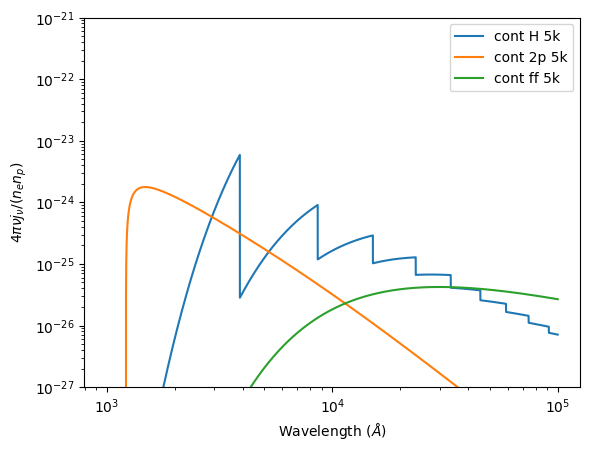

In [199]:
C = pn.Continuum()
wl = np.logspace(3, 5, 8000)
dense = 1e4
contH_5k = C.get_continuum(tem = 5e3, den = dense, He1_H = 0, He2_H = 0, wl = wl1, HI_label = None, cont_HI=True, cont_HeI=True, cont_HeII=True, 
                      cont_2p=False, cont_ff=False)
plt.plot(wl, contH_5k * wl, label = 'cont H 5k')
cont2p_5k = C.get_continuum(tem = 5e3, den = dense, He1_H = 0, He2_H = 0, wl = wl, HI_label = None, cont_HI=False, cont_HeI=False, cont_HeII=False, 
                      cont_2p=True, cont_ff=False)
plt.plot(wl, cont2p_5k * wl, label = 'cont 2p 5k')
contff_5k = C.get_continuum(tem = 5e3, den = dense, He1_H = 0, He2_H = 0, wl = wl, HI_label = None, cont_HI=False, cont_HeI=False, cont_HeII=False, 
                      cont_2p=False, cont_ff=True)
plt.plot(wl, contff_5k * wl, label = 'cont ff 5k')
plt.legend()
plt.ylim(1e-27, 1e-21)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel(r"$4\pi\nu j_\nu /(n_e n_p)$")

<>:12: SyntaxWarning: invalid escape sequence '\A'
<>:12: SyntaxWarning: invalid escape sequence '\A'
/var/folders/y8/d2bctrt56rx8ckzh_kb2pxl40000gn/T/ipykernel_4020/2610740106.py:12: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength ($\AA$)')


Minimum wavelength of F150W2 filter is 39800.00000000001 A
Maximum wavelength of F150W2 filter is 238199.99999999997 A
Integrate output over wavelength from 39800.00000000001 A to 238199.99999999997 A is 60530.51838610285


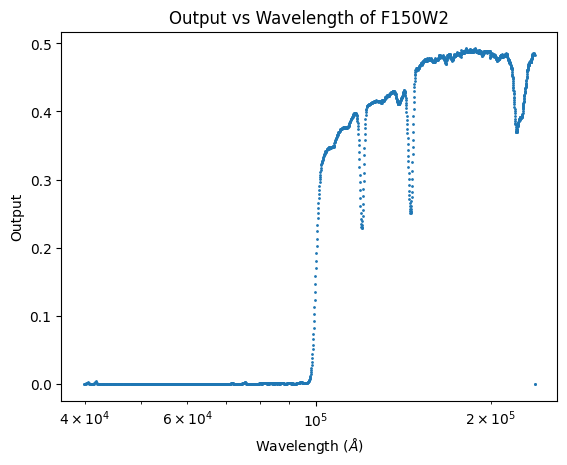

In [201]:
# Output vs wavelength
F150W2 = np.loadtxt('F150W2_filter.txt', skiprows=1)
z = 10
wavelength = F150W2[:, 0]
wavelength_z = wavelength * z * 1e4 # in A
output = F150W2[:, 1]
integral_filter = np.abs(np.trapz(output, wavelength_z))
print(f"Minimum wavelength of F150W2 filter is {np.min(wavelength_z)} A")
print(f"Maximum wavelength of F150W2 filter is {np.max(wavelength_z)} A")
print(f"Integrate output over wavelength from {np.min(wavelength_z)} A to {np.max(wavelength_z)} A is {integral_filter}")
plt.scatter(wavelength_z, output, s=1)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Output')
plt.xscale('log')
plt.title('Output vs Wavelength of F150W2')
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\A'
<>:11: SyntaxWarning: invalid escape sequence '\A'
/var/folders/y8/d2bctrt56rx8ckzh_kb2pxl40000gn/T/ipykernel_4020/2833950115.py:11: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel("Wavelength ($\AA$)")


Text(0, 0.5, '$4\\pi\\nu j_\\nu /(n_e n_p)$')

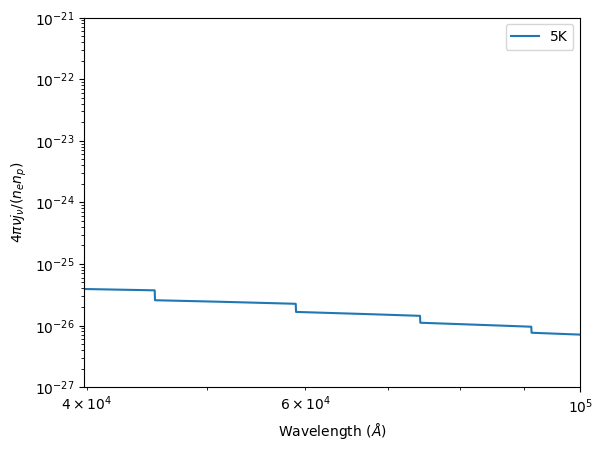

In [207]:
wavelength_considered_min = np.min(wavelength_z)
wavelength_considered_max = np.max(wavelength_z)
if np.max(wl) <= wavelength_considered_max:
    wavelength_considered_max = np.max(wl)
plt.plot(wl, contH_5k * wl, label = '5K')
plt.legend()
plt.xlim(wavelength_considered_min, wavelength_considered_max)
plt.ylim(1e-27, 1e-21)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel(r"$4\pi\nu j_\nu /(n_e n_p)$")

Integrate output and spectrum over wavelength from 39800.00000000001 A to 100000.0 A is 1.210884312760955e-27
Spectrum output average is 2.000452573422799e-32


<>:13: SyntaxWarning: invalid escape sequence '\A'
<>:13: SyntaxWarning: invalid escape sequence '\A'
/var/folders/y8/d2bctrt56rx8ckzh_kb2pxl40000gn/T/ipykernel_4020/2428631223.py:13: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel("Wavelength ($\AA$)")


Text(0, 0.5, '$4\\pi\\nu j_\\nu /(n_e n_p) * filter$')

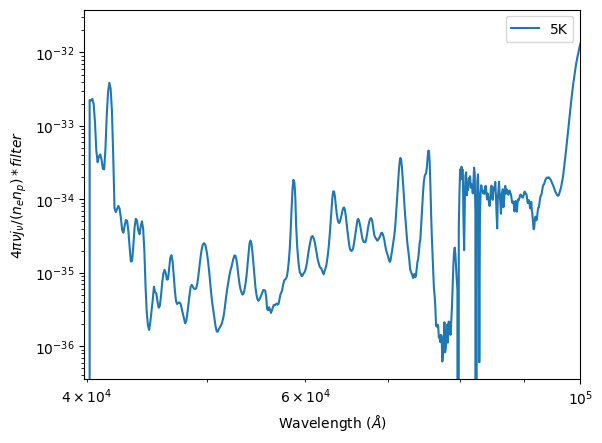

In [213]:
cont_interp_func = interp1d(wl, contH_5k, kind = 'linear', fill_value = "extrapolate")
cont_resampled = cont_interp_func(wavelength_z)
combined_output = cont_resampled * output
integral_spectrum_filter = np.abs(np.trapz(combined_output, wavelength_z))
print(f"Integrate output and spectrum over wavelength from {wavelength_considered_min} A to {wavelength_considered_max} A is {integral_spectrum_filter}")
spectrum_filter_average = integral_spectrum_filter/integral_filter
print(f"Spectrum output average is {spectrum_filter_average}")
plt.plot(wavelength_z, combined_output, label = '5K')
plt.legend()
plt.xlim(wavelength_considered_min, wavelength_considered_max)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel(r"$4\pi\nu j_\nu /(n_e n_p) * filter$")

In [232]:
temp_range = np.arange(1000, 51000, 1000)
data_list = []

for temp in temp_range:
    contH = C.get_continuum(tem=temp, den=dense, He1_H = He1_H, He2_H = He2_H, wl = wl,
                            HI_label = None, cont_HI = True, cont_HeI = True, cont_HeII = True,
                            cont_2p = False, cont_ff = False)
    cont2p = C.get_continuum(tem=temp, den = dense, He1_H = He1_H, He2_H = He2_H, wl = wl,
                             HI_label = None, cont_HI = False, cont_HeI = False, cont_HeII = False,
                             cont_2p = True, cont_ff = False)
    contff = C.get_continuum(tem = temp, den = dense, He1_H = He1_H, He2_H = He2_H, wl = wl,
                             HI_label = None, cont_HI = False, cont_HeI = False, cont_HeII = False,
                             cont_2p = False, cont_ff = True)

    cont_interp_func = interp1d(wl, contH, kind = 'linear', fill_value = "extrapolate")
    cont_resampled = cont_interp_func(wavelength_z)
    
    combined_output = cont_resampled * output
    
    integral_spectrum_filter = np.abs(np.trapz(combined_output, wavelength_z))
    
    spectrum_filter_average = integral_spectrum_filter / integral_filter
    
    data_list.append({
        'Temperature': temp,
        'Wavelength': wl,
        'cont_H * wavelength': contH * wl,
        'cont_2p * wavelength': cont2p * wl,
        'cont_ff * wavelength': contff * wl,
        'Integrated Spectrum Filter': integral_spectrum_filter,
        'Spectrum Filter Average': spectrum_filter_average
    })

df = pd.DataFrame(data_list)

/opt/anaconda3/lib/python3.12/site-packages/pyneb/core/continuum.py:135: RuntimeWarning: invalid value encountered in power
  A = 202.0 * (y * (1. - y) * (1. -(4. * y * (1 - y))**0.8) + 0.88 * ( y * (1 - y))**1.53 * (4. * y * (1 - y))**0.8)


In [234]:
df

,Temperature,Wavelength,cont_H * wavelength,cont_2p * wavelength,cont_ff * wavelength,Integrated Spectrum Filter,Spectrum Filter Average
0,1000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[1.1721768486535988e-67, 1.2725970342520881e-6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.992704324021732e-86, 2.163683023905448e-86,...",1.648329e-26,2.723137e-31
1,2000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[1.9654588223688712e-45, 2.0472926776732343e-4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.6720977559532454e-55, 2.783616983553337e-55...",7.372998e-28,1.218063e-32
2,3000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[3.872848562934984e-38, 3.9787993984033417e-38...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.920983295240958e-45, 6.083436961950554e-45,...",1.004038e-27,1.658731e-32
3,4000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[1.515179236844328e-34, 1.5459251087657902e-34...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.464754513311808e-40, 8.637096481524127e-40,...",1.189128e-27,1.964509e-32
4,5000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[2.0138140668491276e-32, 2.0461918183534728e-3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0225344167830954e-36, 1.0390348912884283e-3...",1.102636e-27,1.821620e-32
5,6000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[5.004149298559219e-31, 5.070584301271968e-31,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.139904531952675e-34, 1.155100866986131e-34,...",9.747593e-28,1.610360e-32
6,7000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[4.808294522714998e-30, 4.862535815946839e-30,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.2639800619087726e-33, 3.300968092399945e-33...",8.528372e-28,1.408938e-32
7,8000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[2.5604526600480175e-29, 2.5855133733113745e-2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.0027738228678645e-32, 4.042144030326143e-32...",7.481048e-28,1.235913e-32
8,9000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[9.251308253646856e-29, 9.331121880543886e-29,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.7920822955685283e-31, 2.8162996808377374e-3...",6.598998e-28,1.090193e-32
9,10000,"[1000.0, 1000.5758839955818, 1001.152099633538...","[2.54485277180703e-28, 2.5644481513997855e-28,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.3130842148613949e-30, 1.3232541454362887e-3...",5.866619e-28,9.692003e-33
